# Proyecto Modulo 3


<a href="https://colab.research.google.com/github/ArturoG1z/Proyecto-Modulo-3-CyAD/blob/main/Notebook/proyecto_modulo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

***PENDIENTE:*** Agregar descripción pequeña del problema del dataset y del objetivo


In [2]:
import pandas as pd
import cufflinks as cf
# from IPython.display import display
cf.set_config_file(sharing='public', theme='pearl', offline=True)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# ruta = '/content/drive/MyDrive/Colab Notebooks/PROYECTO/data set con color.xlsx'
# ruta = './data set Proyecto.xlsx'
ruta = './SEDUCA-2023B.xlsx'
df_original = pd.read_excel(ruta)

In [3]:
df_original.head()

Unnamed: 0                            carrera  No.  Asesor  \
0           1          Ingeniería en Computación    1     NaN   
1           2          Ingeniería en Computación    2     NaN   
2           3          Ingeniería en Computación    3     NaN   
3           4          Ingeniería en Computación    4     NaN   
4           5  Ingeniería en Computación (2019)     1     NaN   

             Comunidad Espacio_Académico  Bloque Grupo  alumnos  \
0  69142 Inglés 8 / D2   Valle de Chalco       0    O5       35   
1  69133 Inglés 6 / C2   Valle de Chalco       0    OB       25   
2  69143 Inglés 8 / D2   Valle de Chalco       0    O6       23   
3  69132 Inglés 6 / C2   Valle de Chalco       0    OA       37   
4  68487 Inglés 8 / D2        CU Texcoco       0    D4       50   

  1er_P_Ponderación-semanas  ...  Porcentaje-Eficiencia-Terminal  Aprobados  \
0                     100\4  ...                             0.0        0.0   
1                      60\6  ...                             0.0        0.0   
2                      60\6  ...                             0.0        0.0   
3                     100\5  ...                             0.0        0.0   
4                       9\9  ...                             0.0        0.0   

   correos_enviados  correos_recibidos  Aprobados ordinario  \
0               NaN                1.0                  0.0   
1               NaN                NaN                  0.0   
2               NaN                NaN                  0.0   
3               NaN                NaN                  0.0   
4               NaN                NaN                  0.0   

   Aprobados extraordinario  Aprobados título  \
0                       0.0               0.0   
1                       0.0               0.0   
2                       0.0               0.0   
3                       0.0               0.0   
4                       0.0               0.0   

   Asesoría académica Respondidas/Recibidas Histórico de chat personal  \
0                                       0\0                        0.0   
1                                       0\0                        0.0   
2                                       0\0                        0.0   
3                                       0\0                        0.0   
4                                       0\0                        0.0   

   Histórico de socializa por comunidad  
0                                   0.0  
1                                   0.0  
2                                   0.0  
3                                   0.0  
4                                   0.0  

[5 rows x 39 columns]

In [4]:
df_original.shape

(1773, 39)

## Limpieza de los datos

### Eliminar columnas innecesarias

In [5]:
# remove last 6 columns and first column
df_original = df_original.iloc[:, :-6]
df_original = df_original.iloc[:, 1:]

In [6]:
df_original.dtypes

carrera                                         object
No.                                              int64
Asesor                                         float64
Comunidad                                       object
Espacio_Académico                               object
Bloque                                           int64
Grupo                                           object
alumnos                                          int64
1er_P_Ponderación-semanas                       object
1p_total_actividades_asignadas                   int64
1p_total_actividades_evaluativas                 int64
1p_porcentaje_evidencias_calificadas           float64
1p_total_actividades_calificadas                 int64
1p_total_actividades_entregadas                float64
1p_porcentaje_evidencias_calificadas_tiempo    float64
1p_total_actividades_calificadas_tiempo        float64
1p_porcentaje_aprobados                          int64
2oP_Ponderación-semanas                         object
2p_total_a

In [7]:
quitar = [
  'Asesor',
  'Bloque',
  'Grupo',
  'Porcentaje-Eficiencia-Terminal',
]

#print(columnas)
df = df_original.drop(quitar, axis=1)

# Eliminando el ID de la materia en la columna 'Comunidad'
df['Comunidad'] = df['Comunidad'].str[5:]
df.head()

carrera  No.       Comunidad Espacio_Académico  \
0          Ingeniería en Computación    1   Inglés 8 / D2   Valle de Chalco   
1          Ingeniería en Computación    2   Inglés 6 / C2   Valle de Chalco   
2          Ingeniería en Computación    3   Inglés 8 / D2   Valle de Chalco   
3          Ingeniería en Computación    4   Inglés 6 / C2   Valle de Chalco   
4  Ingeniería en Computación (2019)     1   Inglés 8 / D2        CU Texcoco   

   alumnos 1er_P_Ponderación-semanas  1p_total_actividades_asignadas  \
0       35                     100\4                              17   
1       25                      60\6                              18   
2       23                      60\6                              19   
3       37                     100\5                              24   
4       50                       9\9                              19   

   1p_total_actividades_evaluativas  1p_porcentaje_evidencias_calificadas  \
0                                17                                   1.0   
1                                18                                   1.0   
2                                19                                   1.0   
3                                22                                   1.0   
4                                18                                   1.0   

   1p_total_actividades_calificadas  ...  2p_total_actividades_calificadas  \
0                               583  ...                             617.0   
1                               438  ...                             452.0   
2                               402  ...                             380.0   
3                               712  ...                             555.0   
4                               770  ...                             765.0   

   2p_total_actividades_entregadas  \
0                            617.0   
1                            452.0   
2                            380.0   
3                            555.0   
4                            765.0   

   2p_porcentaje_evidencias_calificadas_tiempo  \
0                                        0.998   
1                                        1.000   
2                                        1.000   
3                                        0.829   
4                                        1.000   

   2p_total_actividades_calificadas_tiempo 2p_porcentaje_aprobados  \
0                                    616.0                    97.0   
1                                    452.0                     0.0   
2                                    380.0                     0.0   
3                                    460.0                    81.0   
4                                    765.0                     0.0   

   total_actividades_calificadas  trabajos_por_calificar  Aprobados  \
0                         1200.0                     0.0        0.0   
1                          890.0                     0.0        0.0   
2                          782.0                     0.0        0.0   
3                         1267.0                     0.0        0.0   
4                         1535.0                     0.0        0.0   

   correos_enviados  correos_recibidos  
0               NaN                1.0  
1               NaN                NaN  
2               NaN                NaN  
3               NaN                NaN  
4               NaN                NaN  

[5 rows x 28 columns]

### Separar columnas compuestas

In [8]:
# Reemplaza los valores NaN por 0
df.fillna(0, inplace=True)

In [9]:
''' 
CONVERT TO INT
1p_total_actividades_entregadas
1p_total_actividades_entregadas
1p_total_actividades_calificadas_tiempo
2p_total_actividades_asignadas
2p_total_actividades_evaluativas
2p_total_actividades_calificadas
2p_total_actividades_entregadas
2p_total_actividades_calificadas_tiempo
total_actividades_calificadas
trabajos_por_calificar
Aprobados 
'''
columnas = [
  '1p_total_actividades_entregadas',
  '1p_total_actividades_entregadas',
  '1p_total_actividades_calificadas_tiempo',
  '2p_total_actividades_asignadas',
  '2p_total_actividades_evaluativas',
  '2p_total_actividades_calificadas',
  '2p_total_actividades_entregadas',
  '2p_total_actividades_calificadas_tiempo',
  'total_actividades_calificadas',
  'trabajos_por_calificar',
  'Aprobados',
]

for col in columnas:
  df[col] = df[col].astype(int)

In [10]:
df.dtypes

carrera                                         object
No.                                              int64
Comunidad                                       object
Espacio_Académico                               object
alumnos                                          int64
1er_P_Ponderación-semanas                       object
1p_total_actividades_asignadas                   int64
1p_total_actividades_evaluativas                 int64
1p_porcentaje_evidencias_calificadas           float64
1p_total_actividades_calificadas                 int64
1p_total_actividades_entregadas                  int32
1p_porcentaje_evidencias_calificadas_tiempo    float64
1p_total_actividades_calificadas_tiempo          int32
1p_porcentaje_aprobados                          int64
2oP_Ponderación-semanas                         object
2p_total_actividades_asignadas                   int32
2p_total_actividades_evaluativas                 int32
2p_porcentaje_evidencias_calificadas           float64
2p_total_a

In [11]:
# ver rango de valores de cada columna avoiding '<=' not supported between instances of 'str' and 'int' if its object and 
for col in df.columns:
  if df[col].dtype == 'object':
    print(col, df[col].unique())
  else:
    print(col, df[col].min(), df[col].max())

carrera ['Ingeniería en Computación' 'Ingeniería en Computación (2019) '
 'Licenciado en Actuaría' 'Licenciado en Administración'
 'Licenciado en Contaduría ' 'Licenciado en Derecho 2023B'
 'Licenciado en Derecho Internacional ' 'Licenciado en enfermería (2015) '
 'Licenciado en enfermería (2022)' 'Licenciado en enseñanza del inglés '
 'Licenciado en enseñanza del inglés' 'Licenciado en Gastronomía'
 'Licenciado en Gestión de la Información en Redes Sociales'
 'Licenciado en Informática Administrativa'
 'Licenciado en Informática Administrativa (2018) '
 'Licenciado en Informática Administrativa (2018)'
 'Licenciado en Logística'
 'Licenciado en medios alternos de solución de conflictos'
 'Licenciado en Negocios Internacionales' 'Licenciado en Nutrición'
 'Licenciado en Relaciones Económicas Internacionales'
 'Licenciado en Seguridad Ciudadana' 'Licenciado en Trabajo Social']
No. 1 207
Comunidad [' Inglés 8 / D2' ' Inglés 6 / C2' ' Matematicas Discretas' ' Física'
 ' Administracion Y S

In [12]:
# ver valores de 1p_porcentaje_evidencias_calificadas_tiempo mayores a 1
df[df['1p_porcentaje_evidencias_calificadas_tiempo'] > 1]
# show this rows putting the column at first place on a new dataframe
df[df['1p_porcentaje_evidencias_calificadas_tiempo'] > 1][['1p_porcentaje_evidencias_calificadas_tiempo'] + [col for col in df.columns if col != '1p_porcentaje_evidencias_calificadas_tiempo']]

1p_porcentaje_evidencias_calificadas_tiempo  \
1117                                         27.0   
1118                                         28.0   
1120                                          6.0   
1121                                          3.0   

                                       carrera  No.              Comunidad  \
1117  Licenciado en Informática Administrativa    1      Tutoría académica   
1118  Licenciado en Informática Administrativa    2      Tutoría académica   
1120  Licenciado en Informática Administrativa    4   PRACTICA PROFESIONAL   
1121  Licenciado en Informática Administrativa    5      Tutoría académica   

                Espacio_Académico  alumnos 1er_P_Ponderación-semanas  \
1117  Contaduría y Administración       36                       100   
1118  Contaduría y Administración       29                       100   
1120              Valle de México        2                         0   
1121  Contaduría y Administración       34                       100   

      1p_total_actividades_asignadas  1p_total_actividades_evaluativas  \
1117                              11                               249   
1118                              10                               217   
1120                               0                                10   
1121                              10                                16   

      1p_porcentaje_evidencias_calificadas  ...  \
1117                                   0.0  ...   
1118                                   0.0  ...   
1120                                   0.0  ...   
1121                                 222.0  ...   

      2p_total_actividades_calificadas  2p_total_actividades_entregadas  \
1117                                 0                                0   
1118                                 0                                0   
1120                                 0                                0   
1121                                 0                                0   

      2p_porcentaje_evidencias_calificadas_tiempo  \
1117                                          0.0   
1118                                          0.0   
1120                                          0.0   
1121                                          0.0   

      2p_total_actividades_calificadas_tiempo 2p_porcentaje_aprobados  \
1117                                        0                     0.0   
1118                                        0                     0.0   
1120                                        0                     0.0   
1121                                        0                     0.0   

      total_actividades_calificadas  trabajos_por_calificar  Aprobados  \
1117                              0                       0          0   
1118                              0                       0          0   
1120                              0                       0          0   
1121                              0                       0          0   

      correos_enviados  correos_recibidos  
1117               0.0                0.0  
1118               0.0                0.0  
1120               0.0                0.0  
1121               0.0                0.0  

[4 rows x 28 columns]

In [13]:
# Dado que  tiene valores mayores a 1, se procede a dividir por 100 dichos valores que son mayores a 1 (df['1p_porcentaje_evidencias_calificadas_tiempo'] > 1)
df['1p_porcentaje_evidencias_calificadas_tiempo'] = df['1p_porcentaje_evidencias_calificadas_tiempo'].apply(lambda x: x / 100 if x > 1 else x)

In [14]:
''' 1er_P_Ponderación-semanas
2oP_Ponderación-semanas '''
# if is not like this n/n like '100/2' or is int then convert to 0/0 
df['1er_P_Ponderación-semanas'] = df['1er_P_Ponderación-semanas'].apply(lambda x: '0\\0' if type(x) == int or '/' not in x else x)
df['2oP_Ponderación-semanas'] = df['2oP_Ponderación-semanas'].apply(lambda x: '0\\0' if type(x) == int or '/' not in x else x)


In [15]:
# Separando la columna 1er_P_Ponderación-semanas en : 1erPonderacion Semana_1erP splited by '\' and convert to int (nP_ponderacion y nP_semana) n es el parcial colocarlas en la misma posicion donde estaba la columna original

# df[['1p_Ponderacion', '1p_semana']] = df['1er_P_Ponderación-semanas'].str.split('\\', expand=True)
# df['1p_Ponderacion'] = df['1p_Ponderacion'].astype(int)
# df['1p_semana'] = df['1p_semana'].astype(int)
df = df.drop('1er_P_Ponderación-semanas', axis=1)

# # Separando la columna 2oP_Ponderación-semanas
# df[['2p_Ponderacion', '2p_semana']] = df['2oP_Ponderación-semanas'].str.split('\\', expand=True)
# df['2p_Ponderacion'] = df['2p_Ponderacion'].astype(int)
# df['2p_semana'] = df['2p_semana'].astype(int)
df = df.drop('2oP_Ponderación-semanas', axis=1)


# df.tail()
#df.shape

In [16]:

# Cuenta cuántos 0 hay en la columna
numero_ceros_1er = df['1p_porcentaje_aprobados'].value_counts()[0]
numero_ceros_2do = df['2p_porcentaje_aprobados'].value_counts()[0]

# Imprime el número de 0
print(numero_ceros_1er)

# Imprime el número de 0
print(numero_ceros_2do)


880
891


### Obtener nuevas columnas calculadas

In [17]:
df.fillna(0, inplace=True)

In [18]:
# get how many 1er P_Actividades asignadas are diferent than 1er P_Actividades evaluativas
# diferent_values = (numerical_df['1p_total_actividades_asignadas'] != numerical_df['1p_total_actividades_evaluativas']).sum()
# print(diferent_values)

# total de actividades asignadas = Alumnos * 1er P_Actividades asignadas 
# porcentaje as float64
df['1p_total_actividades_esperadas'] = df['alumnos'] * df['1p_total_actividades_asignadas']
df['2p_total_actividades_esperadas'] = df['alumnos'] * df['2p_total_actividades_asignadas']
df['total_actividades_asignadas'] = df['1p_total_actividades_asignadas'] + df['2p_total_actividades_asignadas']

In [19]:
# porcentaje de actividades entregadas = 1p_total_actividades_entregadas / 1p_total_actividades_esperadas
df['1p_porcentaje_actividades_entregadas'] = (df['1p_total_actividades_entregadas'] / df['1p_total_actividades_esperadas']) * 100
df['2p_porcentaje_actividades_entregadas'] = (df['2p_total_actividades_entregadas'] / df['1p_total_actividades_esperadas']) * 100
df['total_actividades_entregadas'] = df['1p_total_actividades_entregadas'] + df['2p_total_actividades_entregadas']
df['porcentaje_actividades_entregadas'] = ((df['1p_total_actividades_entregadas'] + df['2p_total_actividades_entregadas']) / df['total_actividades_asignadas'])
# change nan values to 0
df.fillna(0, inplace=True)

# replace inf values to 0
df.replace([np.inf, -np.inf], 0, inplace=True)

# convert each column to dtype float64
df['1p_porcentaje_actividades_entregadas'] = df['1p_porcentaje_actividades_entregadas'].astype(float)
df['2p_porcentaje_actividades_entregadas'] = df['2p_porcentaje_actividades_entregadas'].astype(float)
df['porcentaje_actividades_entregadas'] = df['porcentaje_actividades_entregadas'].astype(float)

In [20]:
df[df['1p_porcentaje_actividades_entregadas'] > 100].loc[:, ['1p_porcentaje_actividades_entregadas', '1p_total_actividades_entregadas', '1p_total_actividades_asignadas', 'alumnos']]

1p_porcentaje_actividades_entregadas  1p_total_actividades_entregadas  \
1049                                 107.5                              129   

      1p_total_actividades_asignadas  alumnos  
1049                               4       30

In [21]:
df[df['1p_porcentaje_evidencias_calificadas'] > 1].loc[:, ['1p_porcentaje_evidencias_calificadas', '1p_total_actividades_entregadas','1p_total_actividades_calificadas', '1p_total_actividades_asignadas', 'alumnos']]

1p_porcentaje_evidencias_calificadas  1p_total_actividades_entregadas  \
1121                                 222.0                                0   

      1p_total_actividades_calificadas  1p_total_actividades_asignadas  \
1121                                 0                              10   

      alumnos  
1121       34

In [22]:
# remove row with index 1121
df = df.drop(1121)

In [23]:
df.head()

carrera  No.       Comunidad Espacio_Académico  \
0          Ingeniería en Computación    1   Inglés 8 / D2   Valle de Chalco   
1          Ingeniería en Computación    2   Inglés 6 / C2   Valle de Chalco   
2          Ingeniería en Computación    3   Inglés 8 / D2   Valle de Chalco   
3          Ingeniería en Computación    4   Inglés 6 / C2   Valle de Chalco   
4  Ingeniería en Computación (2019)     1   Inglés 8 / D2        CU Texcoco   

   alumnos  1p_total_actividades_asignadas  1p_total_actividades_evaluativas  \
0       35                              17                                17   
1       25                              18                                18   
2       23                              19                                19   
3       37                              24                                22   
4       50                              19                                18   

   1p_porcentaje_evidencias_calificadas  1p_total_actividades_calificadas  \
0                                   1.0                               583   
1                                   1.0                               438   
2                                   1.0                               402   
3                                   1.0                               712   
4                                   1.0                               770   

   1p_total_actividades_entregadas  ...  Aprobados  correos_enviados  \
0                              583  ...          0               0.0   
1                              438  ...          0               0.0   
2                              402  ...          0               0.0   
3                              712  ...          0               0.0   
4                              770  ...          0               0.0   

   correos_recibidos  1p_total_actividades_esperadas  \
0                1.0                             595   
1                0.0                             450   
2                0.0                             437   
3                0.0                             888   
4                0.0                             950   

   2p_total_actividades_esperadas  total_actividades_asignadas  \
0                             665                           36   
1                             475                           37   
2                             460                           39   
3                             740                           44   
4                            1050                           40   

   1p_porcentaje_actividades_entregadas  2p_porcentaje_actividades_entregadas  \
0                             97.983193                            103.697479   
1                             97.333333                            100.444444   
2                             91.990847                             86.956522   
3                             80.180180                             62.500000   
4                             81.052632                             80.526316   

   total_actividades_entregadas  porcentaje_actividades_entregadas  
0                          1200                          33.333333  
1                           890                          24.054054  
2                           782                          20.051282  
3                          1267                          28.795455  
4                          1535                          38.375000  

[5 rows x 33 columns]

### Filas con valores nulos

In [24]:
# search for nan values in numerical_df
nan_values = df.isna().sum()
print(nan_values)

carrera                                        0
No.                                            0
Comunidad                                      0
Espacio_Académico                              0
alumnos                                        0
1p_total_actividades_asignadas                 0
1p_total_actividades_evaluativas               0
1p_porcentaje_evidencias_calificadas           0
1p_total_actividades_calificadas               0
1p_total_actividades_entregadas                0
1p_porcentaje_evidencias_calificadas_tiempo    0
1p_total_actividades_calificadas_tiempo        0
1p_porcentaje_aprobados                        0
2p_total_actividades_asignadas                 0
2p_total_actividades_evaluativas               0
2p_porcentaje_evidencias_calificadas           0
2p_total_actividades_calificadas               0
2p_total_actividades_entregadas                0
2p_porcentaje_evidencias_calificadas_tiempo    0
2p_total_actividades_calificadas_tiempo        0
2p_porcentaje_aproba

In [25]:
# search for 0 values in numerical_df
zero_values = (df == 0).sum()
print(zero_values)

carrera                                           0
No.                                               0
Comunidad                                         0
Espacio_Académico                                 0
alumnos                                           0
1p_total_actividades_asignadas                  643
1p_total_actividades_evaluativas                655
1p_porcentaje_evidencias_calificadas            719
1p_total_actividades_calificadas                716
1p_total_actividades_entregadas                 697
1p_porcentaje_evidencias_calificadas_tiempo     798
1p_total_actividades_calificadas_tiempo         798
1p_porcentaje_aprobados                         879
2p_total_actividades_asignadas                  673
2p_total_actividades_evaluativas                690
2p_porcentaje_evidencias_calificadas            756
2p_total_actividades_calificadas                756
2p_total_actividades_entregadas                 732
2p_porcentaje_evidencias_calificadas_tiempo     811
2p_total_act

In [26]:
# numero de registros que cumplen con la condicion de que todas las columnas que se pasan como parametro son 0
def count_zeros(df, columns):
  return (df[columns] == 0).all(axis=1).sum()


In [27]:
# num of rows with 0 in each column 1p_total_actividades_asignadas and 1p_porcentaje_aprobados
count_zeros(df, ['1p_total_actividades_asignadas', '1p_porcentaje_aprobados', '2p_total_actividades_asignadas', '2p_porcentaje_aprobados'])

622

In [28]:
relacion_datos_vacios = pd.DataFrame({
  '1p_con_actividades_asignadas_2p_sin_actividades_asignadas': df[(df['1p_total_actividades_asignadas'] == 0) & (df['2p_total_actividades_asignadas'] > 0)].shape[0],
  '1p_sin_actividades_asignadas_2p_con_actividades_asignadas': df[(df['2p_total_actividades_asignadas'] == 0) & (df['1p_total_actividades_asignadas'] > 0)].shape[0],
  '1p_sin_porcentaje_aprobados_2p_con_porcentaje_aprobados': df[(df['1p_porcentaje_aprobados'] == 0) & (df['2p_porcentaje_aprobados'] > 0)].shape[0],
  '1p_con_porcentaje_aprobados_2p_sin_porcentaje_aprobados': df[(df['2p_porcentaje_aprobados'] == 0) & (df['1p_porcentaje_aprobados'] > 0)].shape[0],
}, index=[0])

display(relacion_datos_vacios)


1p_con_actividades_asignadas_2p_sin_actividades_asignadas  \
0                                                 21           

   1p_sin_actividades_asignadas_2p_con_actividades_asignadas  \
0                                                 51           

   1p_sin_porcentaje_aprobados_2p_con_porcentaje_aprobados  \
0                                                 28         

   1p_con_porcentaje_aprobados_2p_sin_porcentaje_aprobados  
0                                                 39

In [29]:
df_sin_participacion = df[((df['1p_total_actividades_asignadas'] == 0) & (df['1p_porcentaje_aprobados'] == 0) & (df['2p_total_actividades_asignadas'] == 0) & (df['2p_porcentaje_aprobados'] == 0))]
df_sin_participacion.shape

(622, 33)

In [30]:
# remove rows with 0 in ['1p_total_actividades_asignadas', '1p_porcentaje_aprobados', '2p_total_actividades_asignadas', '2p_porcentaje_aprobados']
df = df[~((df['1p_total_actividades_asignadas'] == 0) & (df['1p_porcentaje_aprobados'] == 0) & (df['2p_total_actividades_asignadas'] == 0) & (df['2p_porcentaje_aprobados'] == 0))]

In [31]:
df.shape

(1150, 33)

In [32]:
count_zeros(df, ['1p_porcentaje_aprobados'])

257

In [33]:
count_zeros(df, ['2p_porcentaje_aprobados'])

268

## Entrenar modelo


In [34]:
# Split df into categorical df and numerical df first 4 columns are categorical and the rest are numerical
categorical_df = df.iloc[:, :4]
numerical_df = df.iloc[:, 4:]

In [35]:
categorical_features = categorical_df.columns
numerical_features = numerical_df.columns

In [36]:
numerical_features

Index(['alumnos', '1p_total_actividades_asignadas',
       '1p_total_actividades_evaluativas',
       '1p_porcentaje_evidencias_calificadas',
       '1p_total_actividades_calificadas', '1p_total_actividades_entregadas',
       '1p_porcentaje_evidencias_calificadas_tiempo',
       '1p_total_actividades_calificadas_tiempo', '1p_porcentaje_aprobados',
       '2p_total_actividades_asignadas', '2p_total_actividades_evaluativas',
       '2p_porcentaje_evidencias_calificadas',
       '2p_total_actividades_calificadas', '2p_total_actividades_entregadas',
       '2p_porcentaje_evidencias_calificadas_tiempo',
       '2p_total_actividades_calificadas_tiempo', '2p_porcentaje_aprobados',
       'total_actividades_calificadas', 'trabajos_por_calificar', 'Aprobados',
       'correos_enviados', 'correos_recibidos',
       '1p_total_actividades_esperadas', '2p_total_actividades_esperadas',
       'total_actividades_asignadas', '1p_porcentaje_actividades_entregadas',
       '2p_porcentaje_actividades_en

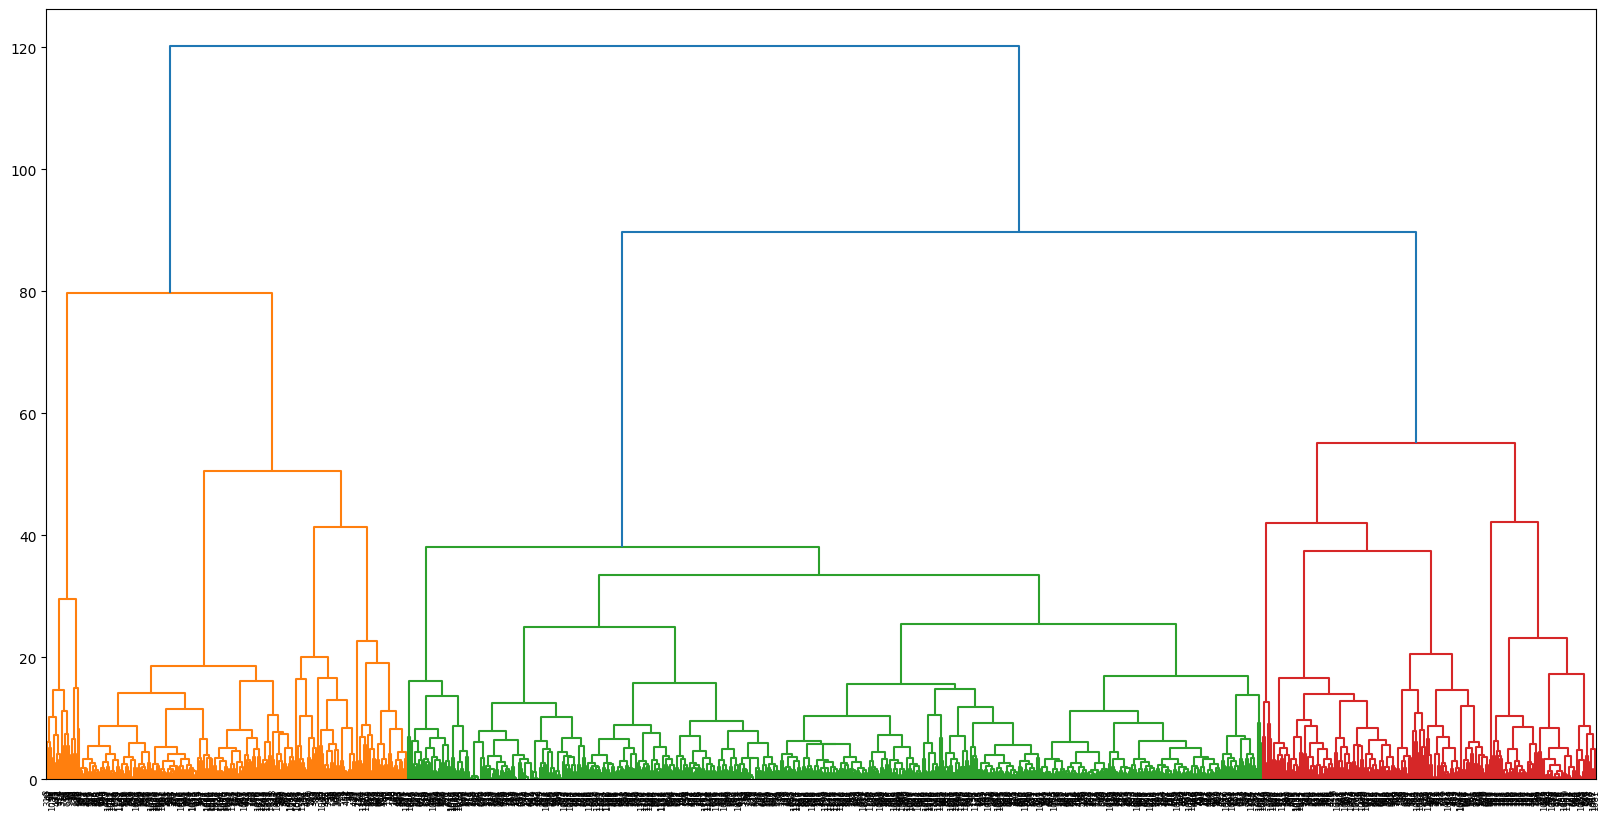

In [37]:
import plotly.express as px

# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(numerical_df)

# Create a PCA instance: pca
# pca = PCA(n_components=3)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)

# Save components to a DataFrame
# PCA_components = pd.DataFrame(principalComponents, columns=['pca1', 'pca2', 'pca3'])
PCA_components = pd.DataFrame(principalComponents, columns=['pca1', 'pca2'])

# df.head()

# Concatenate the DataFrames
df_final = pd.concat([PCA_components, df], axis=1)


# using  dendrogram, linkage, fcluster 
# Calculate the linkage: mergings
mergings = linkage(X_std, 'ward')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(20, 10))
dendrogram(
  mergings,
  leaf_rotation=90,
  leaf_font_size=6,
) 
plt.show()
clusters = fcluster(mergings, t=85, criterion='distance')

df_final['cluster'] = 'Cluster ' + pd.Series(clusters).astype(str)

In [38]:


# fig = px.scatter_3d(df_final, x='pca1', y='pca2', z='pca3', color='cluster')
fig = px.scatter(df_final, x='pca1', y='pca2', color='cluster')
# increase the graph size
fig.update_layout(
  title='Clusters',
  scene=dict(
      xaxis=dict(title='PCA 1'),
      yaxis=dict(title='PCA 2'),
      # zaxis=dict(title='PCA 3')
  ),
  margin=dict(l=0, r=0, b=0, t=0),
  height=800,
  width=800
)
fig.show()


In [39]:
df_final.dtypes

pca1                                           float64
pca2                                           float64
carrera                                         object
No.                                            float64
Comunidad                                       object
Espacio_Académico                               object
alumnos                                        float64
1p_total_actividades_asignadas                 float64
1p_total_actividades_evaluativas               float64
1p_porcentaje_evidencias_calificadas           float64
1p_total_actividades_calificadas               float64
1p_total_actividades_entregadas                float64
1p_porcentaje_evidencias_calificadas_tiempo    float64
1p_total_actividades_calificadas_tiempo        float64
1p_porcentaje_aprobados                        float64
2p_total_actividades_asignadas                 float64
2p_total_actividades_evaluativas               float64
2p_porcentaje_evidencias_calificadas           float64
2p_total_a

In [40]:
# now with df original wee have 3 clusters to interpret the data make 3 dataframes with each cluster  (df_final['cluster']) and see the mean of each cluster
df_by_cluster = df_final.groupby("cluster")
df_by_cluster

In [41]:
# display total of each cluster
for name, group in df_by_cluster:
  print(name, group.shape)

Cluster 1 (268, 36)
Cluster 2 (634, 36)
Cluster 3 (248, 36)


In [42]:

# wee have 26 columns that are numerical from numerical_df

# fig = px.scatter(df_final, x='total_actividades_asignadas', y='porcentaje_actividades_entregadas', color='cluster')
# fig.show()
for col in numerical_features:
  fig = px.box(df_final, x='cluster', y=col, title=col)
  # add the mean of each cluster for the column
  fig.add_scatter(x=df_by_cluster[col].mean().index, y=df_by_cluster[col].mean().values, mode='markers', marker=dict(size=10, color='black'), name='media')
  fig.show()
  # imprime un grafico de barras con la media de cada columna por cluster en un solo grafico
  # fig = px.bar(df_by_cluster[col].mean().reset_index(), x='cluster', y=col)
  # fig.show()
  
  # y un histograma de la columna por cluster
  # fig = px.histogram(df_final, x=col, color='cluster')
  # fig.show()
  #

In [43]:
descriptions = {}

# get statistics of each cluster
for cluster, data in df_by_cluster:
  print(cluster)
  ## see graphics of each cluster
  """ Con los siguientes datos de un data set sobre rendimiento de grupos de universidad en una plataforma educativa virtual

  alumnos
  total_actividades_asignadas
  porcentaje_actividades_entregadas
  1p_porcentaje_actividades_entregadas
  2p_porcentaje_actividades_entregadas

  1p_total_actividades_calificadas
  1p_porcentaje_evidencias_calificadas_tiempo
  1p_total_actividades_calificadas_tiempo

  2p_total_actividades_calificadas
  2p_porcentaje_evidencias_calificadas_tiempo
  2p_total_actividades_calificadas_tiempo


  1p_porcentaje_aprobados
  2p_porcentaje_aprobados

  correos_enviados
  correos_recibidos

  con los 3 clusters obtenidos que etiquetan a estos datos, como obtener grafico de barras de 
  """
  description = data.describe()
  descriptions[cluster] = description
  display(description)
  
  print('\n\n')
  # correlation matrix only with numerical_features
  
  cluster_numerical_df = data[numerical_features]
  # correlation matrix
  correlation_matrix = cluster_numerical_df.corr()

  # plot correlation matrix with plotly
  fig = px.imshow(correlation_matrix, title=f'Correlation matrix for cluster {cluster}')
  # increase the graph size
  fig.update_layout(
    title=f'Correlation matrix for cluster {cluster}',
    margin=dict(l=0, r=0, b=0, t=0),
    height=1200
  )
  fig.show()
  


Cluster 1


pca1        pca2         No.     alumnos  \
count  268.000000  268.000000  183.000000  183.000000   
mean     4.500279    0.485569   59.240437   25.994536   
std      4.235463    1.691290   56.202607   11.801703   
min     -0.498930   -3.735097    1.000000    1.000000   
25%      1.689499   -0.646144   15.000000   18.000000   
50%      3.198915    0.173313   42.000000   25.000000   
75%      5.773265    1.511869   95.500000   32.500000   
max     23.628832    7.816793  206.000000   59.000000   

       1p_total_actividades_asignadas  1p_total_actividades_evaluativas  \
count                      183.000000                        183.000000   
mean                         9.524590                          8.978142   
std                          6.681794                          6.668737   
min                          0.000000                          0.000000   
25%                          6.000000                          5.000000   
50%                          8.000000                          7.000000   
75%                         11.000000                         10.000000   
max                         39.000000                         39.000000   

       1p_porcentaje_evidencias_calificadas  1p_total_actividades_calificadas  \
count                            183.000000                        183.000000   
mean                               0.922268                        213.360656   
std                                0.254051                        253.620901   
min                                0.000000                          0.000000   
25%                                1.000000                         74.000000   
50%                                1.000000                        130.000000   
75%                                1.000000                        234.500000   
max                                1.000000                       1749.000000   

       1p_total_actividades_entregadas  \
count                       183.000000   
mean                        219.437158   
std                         250.612229   
min                           0.000000   
25%                          87.000000   
50%                         134.000000   
75%                         246.000000   
max                        1749.000000   

       1p_porcentaje_evidencias_calificadas_tiempo  ...  Aprobados  \
count                                   183.000000  ...      183.0   
mean                                      0.617131  ...        0.0   
std                                       0.386374  ...        0.0   
min                                       0.000000  ...        0.0   
25%                                       0.228500  ...        0.0   
50%                                       0.784000  ...        0.0   
75%                                       0.989500  ...        0.0   
max                                       1.000000  ...        0.0   

       correos_enviados  correos_recibidos  1p_total_actividades_esperadas  \
count        183.000000         183.000000                      183.000000   
mean           6.983607           6.836066                      266.612022   
std           14.080021           9.928060                      287.169202   
min            0.000000           0.000000                        0.000000   
25%            0.000000           0.000000                      108.000000   
50%            1.000000           3.000000                      180.000000   
75%            7.500000           9.000000                      307.000000   
max           98.000000          55.000000                     1989.000000   

       2p_total_actividades_esperadas  total_actividades_asignadas  \
count                      183.000000                   183.000000   
mean                       230.836066                    17.912568   
std                        225.830909                    11.371016   
min                          0.000000                     1.000000   
25%                         90

Cluster 2


pca1        pca2         No.     alumnos  \
count  634.000000  634.000000  381.000000  381.000000   
mean    -0.779447   -1.336859   69.412073   23.060367   
std      1.253927    0.807194   56.862537   10.204696   
min     -4.228857   -4.624887    1.000000    1.000000   
25%     -1.623439   -1.866276   19.000000   17.000000   
50%     -0.905362   -1.398623   55.000000   20.000000   
75%     -0.031098   -0.886277  117.000000   29.000000   
max      6.495443    1.626476  204.000000   62.000000   

       1p_total_actividades_asignadas  1p_total_actividades_evaluativas  \
count                      381.000000                        381.000000   
mean                         8.792651                          9.167979   
std                          5.828835                         17.068843   
min                          0.000000                          0.000000   
25%                          6.000000                          5.000000   
50%                          8.000000                          7.000000   
75%                         10.000000                          9.000000   
max                         37.000000                        249.000000   

       1p_porcentaje_evidencias_calificadas  1p_total_actividades_calificadas  \
count                            381.000000                        381.000000   
mean                               0.947344                        158.385827   
std                                0.217941                        140.223696   
min                                0.000000                          0.000000   
25%                                1.000000                         77.000000   
50%                                1.000000                        122.000000   
75%                                1.000000                        194.000000   
max                                1.000000                       1321.000000   

       1p_total_actividades_entregadas  \
count                       381.000000   
mean                        160.167979   
std                         140.232169   
min                           0.000000   
25%                          78.000000   
50%                         123.000000   
75%                         195.000000   
max                        1321.000000   

       1p_porcentaje_evidencias_calificadas_tiempo  ...  Aprobados  \
count                                   381.000000  ...      381.0   
mean                                      0.673121  ...        0.0   
std                                       0.363632  ...        0.0   
min                                       0.000000  ...        0.0   
25%                                       0.379000  ...        0.0   
50%                                       0.840000  ...        0.0   
75%                                       0.993000  ...        0.0   
max                                       1.000000  ...        0.0   

       correos_enviados  correos_recibidos  1p_total_actividades_esperadas  \
count        381.000000         381.000000                      381.000000   
mean          10.545932          11.288714                      199.511811   
std           16.374760          12.980171                      175.794267   
min            0.000000           0.000000                        0.000000   
25%            0.000000           1.000000                      104.000000   
50%            4.000000           7.000000                      153.000000   
75%           15.000000          16.000000                      238.000000   
max          149.000000          83.000000                     1440.000000   

       2p_total_actividades_esperadas  total_actividades_asignadas  \
count                      381.000000                   381.000000   
mean                       175.779528                    16.792651   
std                        163.212063                    11.432481   
min                          0.000000                     1.000000   
25%                         88

Cluster 3


pca1        pca2         No.     alumnos  \
count  248.000000  248.000000  143.000000  143.000000   
mean    -2.870585    2.892888   54.811189   26.832168   
std      1.858732    1.701423   52.157393   11.518501   
min     -5.700048   -1.358662    2.000000    3.000000   
25%     -4.319313    1.520906   18.000000   17.500000   
50%     -3.176159    3.141271   34.000000   29.000000   
75%     -1.412802    4.226304   84.500000   34.000000   
max      3.445354    7.783499  207.000000   57.000000   

       1p_total_actividades_asignadas  1p_total_actividades_evaluativas  \
count                      143.000000                        143.000000   
mean                         8.062937                          7.503497   
std                          5.496755                          5.057242   
min                          0.000000                          0.000000   
25%                          5.000000                          5.000000   
50%                          7.000000                          7.000000   
75%                          9.000000                          8.000000   
max                         36.000000                         36.000000   

       1p_porcentaje_evidencias_calificadas  1p_total_actividades_calificadas  \
count                            143.000000                        143.000000   
mean                               0.936035                        173.937063   
std                                0.243533                        152.337571   
min                                0.000000                          0.000000   
25%                                1.000000                         79.500000   
50%                                1.000000                        134.000000   
75%                                1.000000                        213.500000   
max                                1.000000                        986.000000   

       1p_total_actividades_entregadas  \
count                       143.000000   
mean                        176.804196   
std                         151.779457   
min                           0.000000   
25%                          84.500000   
50%                         135.000000   
75%                         219.500000   
max                         986.000000   

       1p_porcentaje_evidencias_calificadas_tiempo  ...  Aprobados  \
count                                   143.000000  ...      143.0   
mean                                      0.586860  ...        0.0   
std                                       0.376042  ...        0.0   
min                                       0.000000  ...        0.0   
25%                                       0.245500  ...        0.0   
50%                                       0.673000  ...        0.0   
75%                                       0.977500  ...        0.0   
max                                       1.000000  ...        0.0   

       correos_enviados  correos_recibidos  1p_total_actividades_esperadas  \
count        143.000000         143.000000                      143.000000   
mean           8.517483           8.783217                      214.356643   
std           17.034287          16.210386                      187.871825   
min            0.000000           0.000000                        0.000000   
25%            0.000000           0.000000                      102.000000   
50%            1.000000           2.000000                      168.000000   
75%            9.000000           9.000000                      256.000000   
max           82.000000          94.000000                     1044.000000   

       2p_total_actividades_esperadas  total_actividades_asignadas  \
count                      143.000000                   143.000000   
mean                       195.489510                    15.405594   
std                        178.756734                     9.915302   
min                          0.000000                     1.000000   
25%                         82

In [44]:
# pass to excel the description of each cluster
# description = data.describe()
# descriptions[cluster] = description


with pd.ExcelWriter("cluster_descriptions_hierarichal.xlsx") as writer:
  for cluster, description in descriptions.items():
    description.to_excel(writer, sheet_name=cluster)

In [45]:
categorical_df.head()

carrera  No.       Comunidad Espacio_Académico
0          Ingeniería en Computación    1   Inglés 8 / D2   Valle de Chalco
1          Ingeniería en Computación    2   Inglés 6 / C2   Valle de Chalco
2          Ingeniería en Computación    3   Inglés 8 / D2   Valle de Chalco
3          Ingeniería en Computación    4   Inglés 6 / C2   Valle de Chalco
4  Ingeniería en Computación (2019)     1   Inglés 8 / D2        CU Texcoco

In [46]:
def scatter_by_category(df, x, y, category, title):
  fig = px.scatter(df, x=x, y=y, color=category, title=title)
  fig.show()

def count_by_category(df, category, title):
  fig = px.histogram(df, x=category, title=title)
  fig.update_layout(
    height=1200
  )
  fig.show()

In [47]:
# for each cluster see a scatter plot of the 2 first principal components and labaled by categorical features

for cluster, data in df_by_cluster:
  # scatter_by_category(data, 'pca1', 'pca2', 'Comunidad', f'Comunidad {cluster}')
  count_by_category(data, 'Comunidad', f'Comunidad {cluster}')

for cluster, data in df_by_cluster:
  # scatter_by_category(data, 'pca1', 'pca2', 'carrera', f'Carrera {cluster}')
  count_by_category(data, 'carrera', f'Carrera {cluster}')

for cluster, data in df_by_cluster:
  # scatter_by_category(data, 'pca1', 'pca2', 'Espacio_Académico', f'Espacio Académico {cluster}')
  count_by_category(data, 'Espacio_Académico', f'Espacio Académico {cluster}')


In [48]:
count_by_category(df_sin_participacion, 'Comunidad', 'Comunidad sin uso de plataforma')
count_by_category(df_sin_participacion, 'carrera', 'Carrera sin uso de plataforma')
count_by_category(df_sin_participacion, 'Espacio_Académico', 'Espacio Académico sin uso de plataforma')

In [49]:
df_by_cluster['alumnos'].mean().values[0]


25.994535519125684

In [50]:
# put the mean data in a new dataframe
# with cols = ['column', 'cluster 0', 'cluster 1', 'cluster 2']
list = []
for col in numerical_features:
  dict = {'column': col }
  for cluster, data in df_by_cluster:
    dict[cluster] = data[col].mean()
  list.append(dict)
# make column the index

df_mean = pd.DataFrame(list).set_index('column')

df_mean

# pass to excel the mean of each cluster
with pd.ExcelWriter("cluster_means_hierarichal.xlsx") as writer:
  df_mean.to_excel(writer, sheet_name='means')
